Input Jumlah Pembelian: Rp 450
Input Frekuensi Pelanggan: 12 transaksi/bulan
Diskon yang diberikan: 25.00%


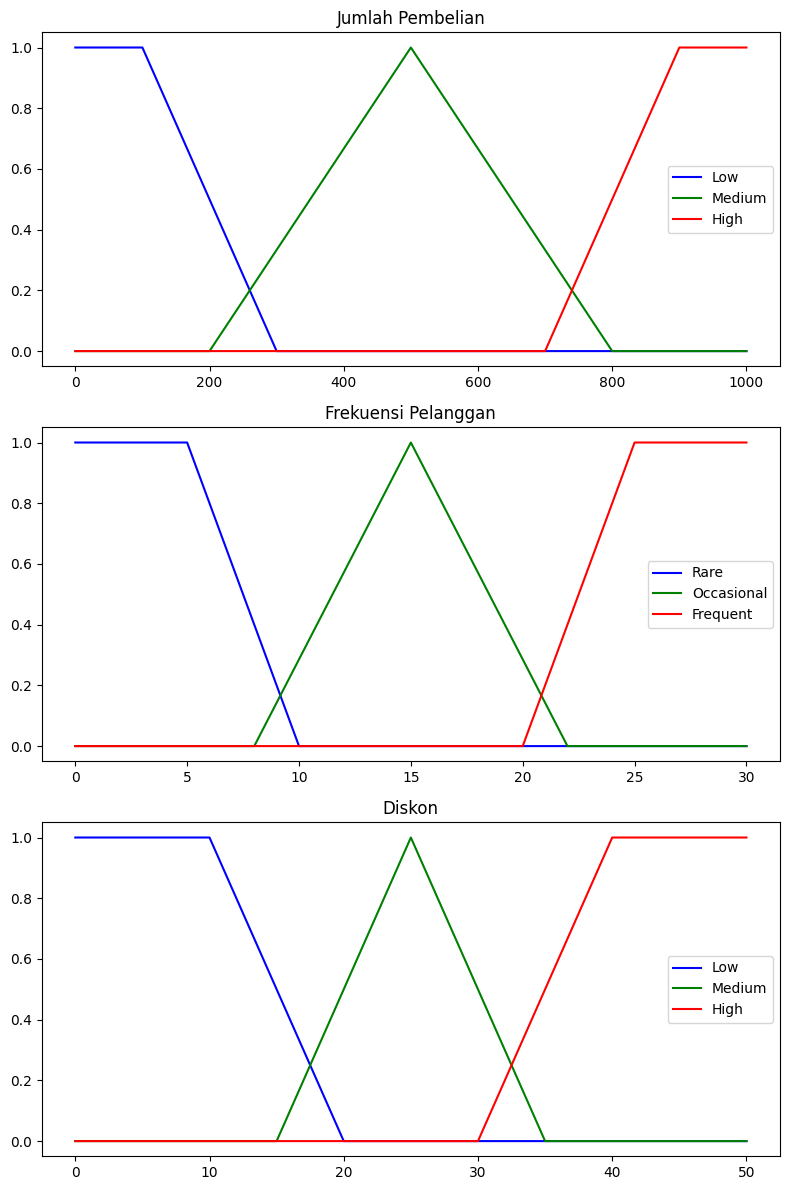

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define Fuzzy Variables
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 1001, 1), 'jumlah_pembelian')
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 31, 1), 'frekuensi_pelanggan')
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# Define Membership Functions for Jumlah Pembelian
jumlah_pembelian['low'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 100, 300])
jumlah_pembelian['medium'] = fuzz.trimf(jumlah_pembelian.universe, [200, 500, 800])
jumlah_pembelian['high'] = fuzz.trapmf(jumlah_pembelian.universe, [700, 900, 1000, 1000])

# Define Membership Functions for Frekuensi Pelanggan
frekuensi_pelanggan['rare'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 5, 10])
frekuensi_pelanggan['occasional'] = fuzz.trimf(frekuensi_pelanggan.universe, [8, 15, 22])
frekuensi_pelanggan['frequent'] = fuzz.trapmf(frekuensi_pelanggan.universe, [20, 25, 30, 30])

# Define Membership Functions for Diskon
diskon['low'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['medium'] = fuzz.trimf(diskon.universe, [15, 25, 35])
diskon['high'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# Define Fuzzy Rules
rule1 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['rare'], diskon['low'])
rule2 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['occasional'], diskon['medium'])
rule3 = ctrl.Rule(jumlah_pembelian['high'] | frekuensi_pelanggan['frequent'], diskon['high'])
rule4 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['frequent'], diskon['medium'])
rule5 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['frequent'], diskon['high'])
rule6 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['rare'], diskon['medium'])

# Create Control System
diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
diskon_sim = ctrl.ControlSystemSimulation(diskon_ctrl)

# Input Values for Simulation
jumlah_pembelian_value = 450  # Example Input: Rp 450.000
frekuensi_pelanggan_value = 12  # Example Input: 12 transactions

print(f"Input Jumlah Pembelian: Rp {jumlah_pembelian_value}")
print(f"Input Frekuensi Pelanggan: {frekuensi_pelanggan_value} transaksi/bulan")

diskon_sim.input['jumlah_pembelian'] = jumlah_pembelian_value
diskon_sim.input['frekuensi_pelanggan'] = frekuensi_pelanggan_value

# Compute the Result
diskon_sim.compute()

# Output Result
print(f"Diskon yang diberikan: {diskon_sim.output['diskon']:.2f}%")

# Visualize Membership Functions and Result
import matplotlib.pyplot as plt

# Plot Membership Functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 12))

ax0.plot(jumlah_pembelian.universe, jumlah_pembelian['low'].mf, 'b', label='Low')
ax0.plot(jumlah_pembelian.universe, jumlah_pembelian['medium'].mf, 'g', label='Medium')
ax0.plot(jumlah_pembelian.universe, jumlah_pembelian['high'].mf, 'r', label='High')
ax0.set_title('Jumlah Pembelian')
ax0.legend()

ax1.plot(frekuensi_pelanggan.universe, frekuensi_pelanggan['rare'].mf, 'b', label='Rare')
ax1.plot(frekuensi_pelanggan.universe, frekuensi_pelanggan['occasional'].mf, 'g', label='Occasional')
ax1.plot(frekuensi_pelanggan.universe, frekuensi_pelanggan['frequent'].mf, 'r', label='Frequent')
ax1.set_title('Frekuensi Pelanggan')
ax1.legend()

ax2.plot(diskon.universe, diskon['low'].mf, 'b', label='Low')
ax2.plot(diskon.universe, diskon['medium'].mf, 'g', label='Medium')
ax2.plot(diskon.universe, diskon['high'].mf, 'r', label='High')
ax2.set_title('Diskon')
ax2.legend()

plt.tight_layout()
plt.show()
